## Binomal Distribution - Lottery Tickets!

Imagine you have $n_{peoples}=1.000.000$ peoples who want to play a lottery ticket game. Each person is allowed to draw $n_{draws}=400$ tickets. The chance to draw a winning ticket is $p_{values}=1:200$. Assume a discret binomal distribution.

__Problems:__

1. What is the expected number of winning tickets per person?
2. What is the standard deviation for the number of drawn winning tickets? 
3. How many people (in %) will on average end up with the expected number of winning tickets?
3. How many people (in %) will on average end up within one standard deviation from the the expected number of winning tickets? How does this change with $n_{draws}$?
4. What's the probability to not draw a winning ticket?


In [5]:
# Basic Python Libs
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt
from random import seed
from random import random
import math

The binomal distribution is described by: $B\left(k|n_{draws},p_{values}\right) = \binom{n_{draws}}{k}\cdot p_{values}^k\left(1-p_{values}\right)^{n_{draws}-k}$

1. The expected value of a binomially distributed random variable $X\sim B(n_{draws},p_{values})$ is given by $\mu$:  
$\mu = n_{draws}\cdot p_{values}$  

    Thus for $B(n_{draws}=400, p_{values}= 0.005)$ it follows that the expected number of winning tickets is $2$.


2. The standard deviation is then given by $\sigma$:  
$$\sigma = \sqrt{n_{draws}\cdot p_{values}\left(1-p_{values}\right)}$$

    For the example: $\sigma =1.41$  
    So we expect to find most people drawing between 0 and 4 winning tickets.


3. We computed the expected value of 2, so all we have to do now is to plug it in.  
$$
\begin{align*}
B\left(k=2|n_{draws}=400,p_{values}=0.005\right) &= \binom{400}{2}\cdot 0.005^2\left(0.995\right)^{398} \\
B\left(k=2|n_{draws}=400,p_{values}=0.005\right) &\approx 79800 \cdot 0.000025 \cdot 0.136 \\
B\left(k=2|n_{draws}=400,p_{values}=0.005\right) &\approx 0.271
\end{align*}
$$

    So the probability to draw exactly $2$ winning tickets is approximately $27.1\,\%$.
    That's about only 1/4 of all people!
    
    
4. Since we look at the discrete and not the continues case, we simply need to sum up all $B\left(k|n_{draws},p_{values}\right)$ for $k=\left\lfloor{\mu-\sigma}\right\rfloor, \left\lfloor{\mu-\sigma}\right\rfloor+1,...,\left\lceil{\mu+\sigma}\right\rceil-1,\left\lceil{\mu+\sigma}\right\rceil$, or simply $B\left(\left\lfloor{\mu-\sigma}\right\rfloor\leq k\leq \left\lceil{\mu+\sigma}\right\rceil|n_{draws},p_{values}\right)$. In our case that would be $B\left(0\leq k\leq 4|n_{draws},p_{values}\right)$.  
$$
\begin{align*}
B\left(k=0|n_{draws}=400,p_{values}=0.005\right) &\approx 0.135 \\
B\left(k=1|n_{draws}=400,p_{values}=0.005\right) &\approx 0.271 \\
B\left(k=2|n_{draws}=400,p_{values}=0.005\right) &\approx 0.271 \\
B\left(k=3|n_{draws}=400,p_{values}=0.005\right) &\approx 0.181 \\
B\left(k=4|n_{draws}=400,p_{values}=0.005\right) &\approx 0.090 \\
\end{align*}
$$
 
$$B\left(0\leq k\leq 4|n_{draws}=400,p_{values}=0.005\right) \approx 0.948$$

So we expect about $95\,\%$ of the people to draw between $0$ and $4$ winning tickets. Thus the luckiest $5\,\%$ will end up with $5$ or even more winning tickets!  

Now if we look at $$\lim_{n_{draws}\to\infty} B(n_{draws}, p_{values}= 0.005)$$, we will find that the limit for the binomial distribution is the normal distribution. More precisely, this is the case for large $n$, $np$ and $n(1-p)$. For the normal distribution we can use the $68-95-99.7$ rule, which approximately represents the percentage of values for a sample of the random variable $X$ that is within 1, 2 and 3 standard deviations around the mean.   
    What I found useful is to approximate the binomal distribution with the normal distribution for $\sigma \geq 5$. For $p=0.005$ this would require $n\geq 5025$. We can also plot this below.
    

5. As we have calculated before, that is simply $B\left(k=0|n_{draws}=400,p_{values}=0.005\right) \approx 0.135$.

For n=400 and p=0.005:
The expected value is 2.0 and the STD is 1.41.
The probability to draw the expected number of winningtickets is approximately 27.2%.
Approximately 94.76% of the people are within one STD from the mean.

For n=1000 and p=0.005:
The expected value is 5.0 and the STD is 2.23.
The probability to draw the expected number of winningtickets is approximately 17.6%.
Approximately 89.27% of the people are within one STD from the mean.

For n=1500 and p=0.005:
The expected value is 7.5 and the STD is 2.73.
The probability to draw the expected number of winningtickets is approximately 13.8%.
Approximately 86.26% of the people are within one STD from the mean.

For n=2500 and p=0.005:
The expected value is 12.5 and the STD is 3.53.
The probability to draw the expected number of winningtickets is approximately 11.3%.
Approximately 84.75% of the people are within one STD from the mean.

For n=5000 and p=0.005:
The expected value is 25.0 and the STD is 4.99.
The probability to d

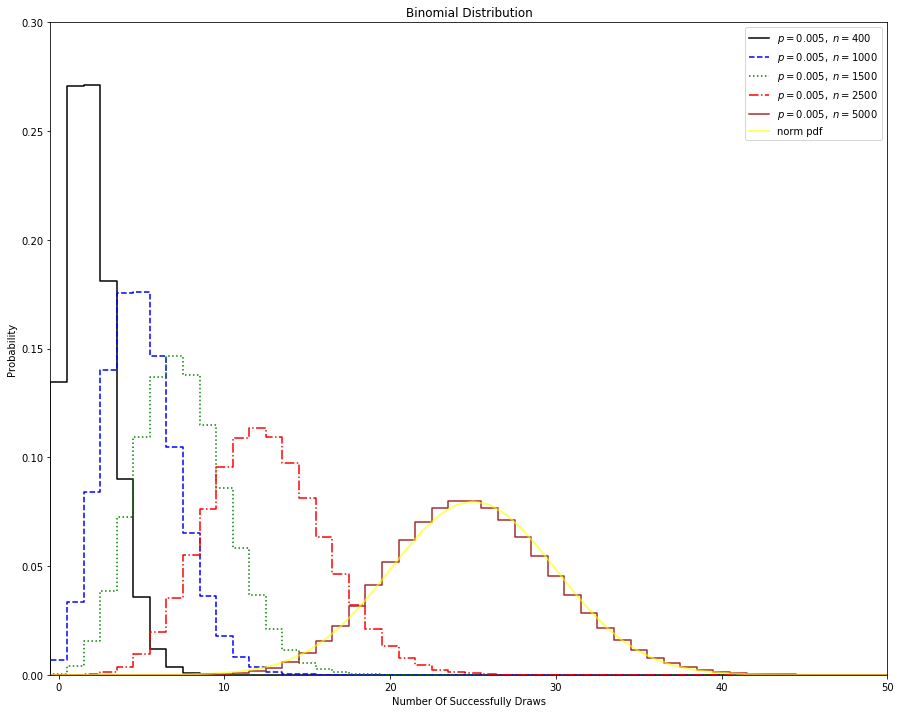

In [6]:
# Define the distribution parameters to be plotted
n_draws = [400, 1000, 1500, 2500, 5000]
n_peoples = [1000000, 1000000, 1000000, 1000000, 1000000]
p_values = [0.005, 0.005, 0.005, 0.005, 0.005]
linestyles = ['-', '--', ':', '-.', '-']
colors = ['black', 'blue', 'green', 'red', 'brown']
x = np.arange(-1, 300)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(15, 12))
for (n, n_people, p, ls, c) in zip(n_draws, n_peoples, p_values, linestyles, colors):
    dist = binom(n, p)
    none_list = dist.rvs(n_people)
    mean_value = n*p
    std_value = (mean_value*(1-p))**(0.5)
    upper_1std = int(math.ceil(mean_value + std_value))
    lower_1std = int(math.floor(mean_value - std_value))
    print("For n={} and p={}:".format(n,p))
    print("The expected value is {} and the STD is {}.".format(n*p,round((n*p*(1-p))**(0.5),2)))
    print("The probability to draw the expected number of winning" + 
          "tickets is approximately {0:.1f}%.".format(100*(none_list == round(mean_value,0)).sum()/n_people))
    print("Approximately {0:.2f}% of the people are within one STD from the mean.".format(100*((none_list >= lower_1std) & (none_list <= upper_1std)).sum()/n_people))
    print()
    plt.plot(x, dist.pmf(x), color=c, linestyle='steps-mid' + ls, label=r'$p=%.3f,\ n=%i$' % (p, n))

dist = norm(25, 5)
none_list = dist.rvs(n_people)
plt.plot(x, dist.pdf(x), 'yellow', lw=2, alpha=0.6, label='norm pdf')
    
    
plt.xlim(-0.5, 2*n*p)
plt.ylim(0, 0.30)
plt.xlabel('Number Of Successfully Draws')
plt.ylabel(r'Probability')
plt.title('Binomial Distribution')
plt.legend()
plt.show()

Now I also want to plot the percentage of people vs. the number of tickets drawn until the person won the lottery for the values of our first example.  
We should find approx. $13.5\,\%$ of people which have not won the lottery after their $400$ tickets.   
Also we should find approx. $0.5\,\%$ of people which have won the lottery with the very first ticket.

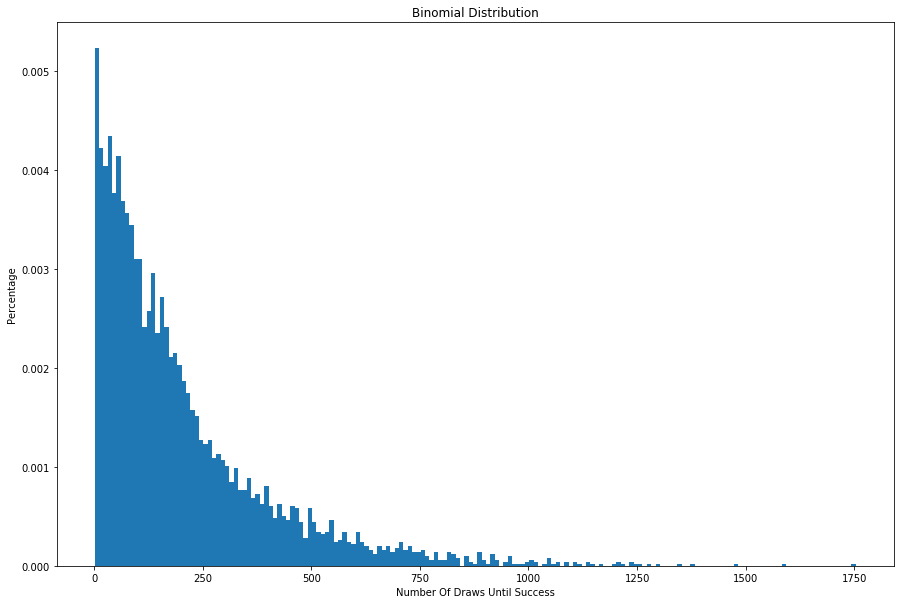

Approximately 13.76% of the people didn't won the lottery after 400 tickets.
Approximately 0.60% of the people won the lottery with their very first.


In [10]:
data_binom = binom.rvs(n=1,p=p_values[0],size=n_peoples[0])
index_list_first_hit = np.where(data_binom == 1)
first_hit_list = np.ediff1d(index_list_first_hit)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(first_hit_list, bins=int(first_hit_list.max()/10), density=True)
plt.xlabel('Number Of Draws Until Success')
plt.ylabel('Percentage')
plt.title('Binomial Distribution')
plt.show()

print("Approximately {0:.2f}% of the people didn't won the lottery after 400 tickets.".format(100*(first_hit_list >= n_draws[0]+1).sum()/len(first_hit_list)))
print("Approximately {0:.2f}% of the people won the lottery with their very first.".format(100*(first_hit_list == 1).sum()/len(first_hit_list)))